# Data Preparation

In [39]:
# ==================== Data Preparation ====================
import pandas as pd
import numpy as np
import difflib
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Load dataset
car_data = pd.read_csv('car data.csv')

# Show dataset
print("Dataset Preview:")
print(car_data.head())


Dataset Preview:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [41]:
tmdb_data = pd.read_csv('car data.csv')

In [43]:
# Load Movies Metadata
metadata = pd.read_csv('car data.csv', low_memory=False)

# Print the first three rows
metadata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Exploration


Metadata Preview:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  

Dataset Preview:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manua

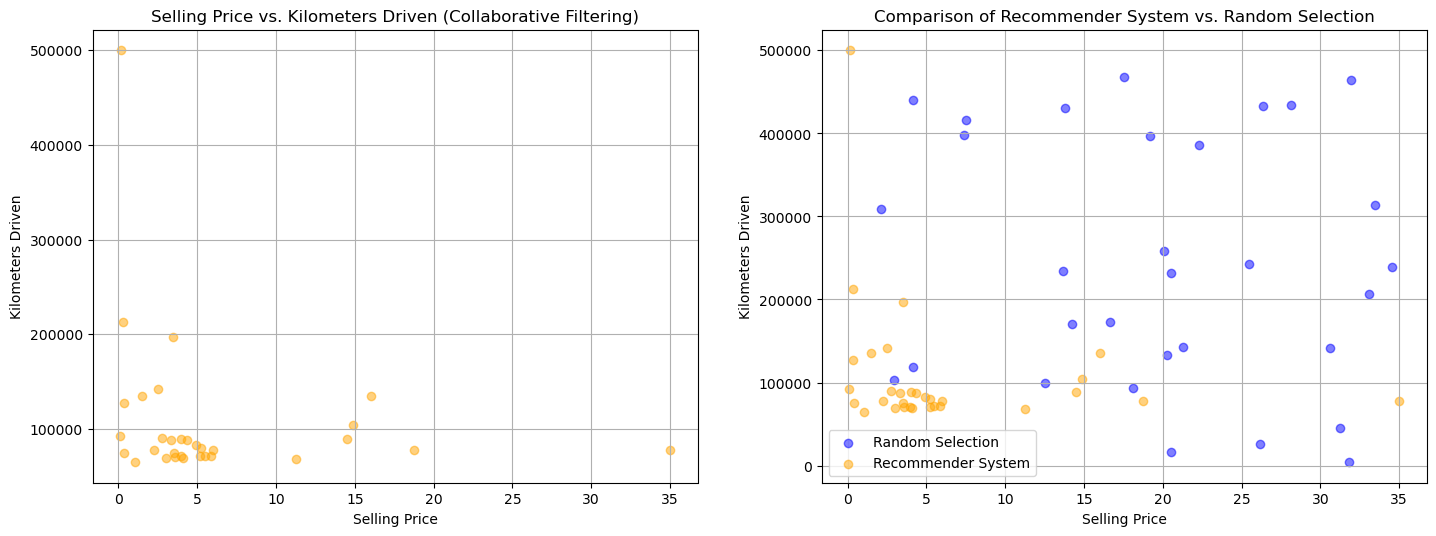

In [46]:
# ==================== Data Exploration ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Car Metadata
car_data = pd.read_csv('car data.csv')

# Print the first three rows
print("\nMetadata Preview:")
print(car_data.head(3))

# Preview dataset
print("\nDataset Preview:")
print(car_data.head())

# Calculate mean selling price
C = car_data['Selling_Price'].mean()
print("\nMean selling price across all cars:", C)

# Calculate the minimum number of kilometers driven to be in the top 10%
m = car_data['Kms_Driven'].quantile(0.90)
print("Minimum kilometers driven to be in the top 10%:", m)

# Filter out qualified cars
q_cars = car_data.copy().loc[car_data['Kms_Driven'] >= m]
print("Number of qualified cars:", q_cars.shape[0])

# Visualization
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for collaborative filtering
axs[0].scatter(q_cars['Selling_Price'], q_cars['Kms_Driven'], color='orange', alpha=0.5)
axs[0].set_title('Selling Price vs. Kilometers Driven (Collaborative Filtering)')
axs[0].set_xlabel('Selling Price')
axs[0].set_ylabel('Kilometers Driven')
axs[0].grid(True)

# Random data generation for comparison
random_selling_price = np.random.uniform(
    low=car_data['Selling_Price'].min(),
    high=car_data['Selling_Price'].max(),
    size=len(q_cars)
)
random_kms_driven = np.random.uniform(
    low=car_data['Kms_Driven'].min(),
    high=car_data['Kms_Driven'].max(),
    size=len(q_cars)
)

# Scatter plot for random vs recommender
axs[1].scatter(random_selling_price, random_kms_driven, color='blue', alpha=0.5, label='Random Selection')
axs[1].scatter(q_cars['Selling_Price'], q_cars['Kms_Driven'], color='orange', alpha=0.5, label='Recommender System')
axs[1].set_title('Comparison of Recommender System vs. Random Selection')
axs[1].set_xlabel('Selling Price')
axs[1].set_ylabel('Kilometers Driven')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout(pad=3)
plt.show()


# Content-Based Filtering Function

In [49]:
# ==================== Content-Based Filtering ====================
# Content-Based Filtering function
def content_based_filtering(car_name):
    # Check if car_name exists in the dataset
    car_index = car_data[car_data['car_name'] == car_name].index
    if len(car_index) == 0:
        return f"Car name '{car_name}' not found in the dataset."

    car_index = car_index[0]  # First index
    # Create combined features
    car_data['combined_features'] = (
        car_data['fuel_type'].astype(str) + ' ' +
        car_data['seller_type'].astype(str) + ' ' +
        car_data['transmission'].astype(str) + ' ' +
        car_data['owner'].astype(str)
    )
    cv = CountVectorizer()
    features_matrix = cv.fit_transform(car_data['combined_features'])
    similarity_scores = cosine_similarity(features_matrix, features_matrix)
    similar_cars = list(enumerate(similarity_scores[car_index]))
    sorted_similar_cars = sorted(similar_cars, key=lambda x: x[1], reverse=True)
    top_similar_cars = sorted_similar_cars[1:11]
    return top_similar_cars

# Collaborative Filtering

In [60]:
# ==================== Collaborative Filtering ====================
from sklearn.metrics.pairwise import cosine_similarity

# Define numeric columns (use correct column names)
numeric_columns = ['Selling_Price', 'Kms_Driven']
numeric_data = car_data[numeric_columns].fillna(0)

# Collaborative Filtering function
def collaborative_filtering(car_name):
    # Check if car_name exists in the dataset
    car_index = car_data[car_data['Car_Name'] == car_name].index
    if len(car_index) == 0:
        return f"Car name '{car_name}' not found in the dataset."

    car_index = car_index[0]  # Get the first matching index
    similarity_matrix = cosine_similarity(numeric_data)
    similar_cars = list(enumerate(similarity_matrix[car_index]))
    sorted_similar_cars = sorted(similar_cars, key=lambda x: x[1], reverse=True)
    top_similar_cars = sorted_similar_cars[1:11]  # Skip the car itself (similarity=1)
    
    # Return car names instead of just indexes
    recommended_cars = []
    for idx, score in top_similar_cars:
        recommended_cars.append((car_data.iloc[idx]['Car_Name'], score))
    
    return recommended_cars

# Example usage
car_name = 'city'  # Try any car name that exists in your dataset
recommendations = collaborative_filtering(car_name)

# Check if recommendations is a string (error message)
if isinstance(recommendations, str):
    print(recommendations)
else:
    print(f"\nTop 10 cars similar to {car_name}:")
    for car, score in recommendations:
        print(f"{car} (Similarity Score: {score:.4f})")



Top 10 cars similar to city:
sx4 (Similarity Score: 1.0000)
i10 (Similarity Score: 1.0000)
city (Similarity Score: 1.0000)
eon (Similarity Score: 1.0000)
wagon r (Similarity Score: 1.0000)
i20 (Similarity Score: 1.0000)
eon (Similarity Score: 1.0000)
Royal Enfield Thunder 350 (Similarity Score: 1.0000)
TVS Apache RTR 180 (Similarity Score: 1.0000)
Royal Enfield Classic 500 (Similarity Score: 1.0000)


# Data Execute/testing

In [72]:
import pandas as pd
import difflib
from sklearn.metrics.pairwise import cosine_similarity

# ==================== Load Dataset ====================
car_data = pd.read_csv('car data.csv')  # Change the path if needed

# Make sure the column names match exactly
print("Columns are:", car_data.columns.tolist())

# ==================== Collaborative Filtering ====================
# Define numeric columns
numeric_columns = ['Selling_Price', 'Kms_Driven']  # Use correct names!
numeric_data = car_data[numeric_columns].fillna(0)

# Collaborative Filtering function
def collaborative_filtering(car_name):
    # Check if car_name exists
    car_index = car_data[car_data['Car_Name'] == car_name].index
    if len(car_index) == 0:
        return f"Car name '{car_name}' not found in the dataset."

    car_index = car_index[0]
    similarity_matrix = cosine_similarity(numeric_data)
    similar_cars = list(enumerate(similarity_matrix[car_index]))
    sorted_similar_cars = sorted(similar_cars, key=lambda x: x[1], reverse=True)
    top_similar_cars = sorted_similar_cars[1:11]  # Top 10 similar cars
    return top_similar_cars

# ==================== Content-Based Filtering ====================
# Let's assume we do content-based filtering using Fuel_Type and Transmission
content_columns = ['Fuel_Type', 'Transmission']
content_data = pd.get_dummies(car_data[content_columns])

def content_based_filtering(car_name):
    car_index = car_data[car_data['Car_Name'] == car_name].index
    if len(car_index) == 0:
        return f"Car name '{car_name}' not found in the dataset."

    car_index = car_index[0]
    similarity_matrix = cosine_similarity(content_data)
    similar_cars = list(enumerate(similarity_matrix[car_index]))
    sorted_similar_cars = sorted(similar_cars, key=lambda x: x[1], reverse=True)
    top_similar_cars = sorted_similar_cars[1:11]
    return top_similar_cars

# ==================== Find Closest Match ====================
def find_closest_match(user_input):
    car_names = car_data['Car_Name'].tolist()  # Corrected column name
    closest_matches = difflib.get_close_matches(user_input, car_names, n=1)
    return closest_matches[0] if closest_matches else None

# ==================== Testing ====================
test_cars = ['Maruti Swift Dzire VDI', 'Hyundai i20 Magna', 'Honda City ZX']

for test_car in test_cars:
    print("\n\n===== Testing for:", test_car, "=====")
    closest_match = find_closest_match(test_car)

    if closest_match:
        print(f"Closest match: {closest_match}")

        collab_results = collaborative_filtering(closest_match)
        content_results = content_based_filtering(closest_match)

        print("\nCollaborative Filtering Results:")
        if isinstance(collab_results, str):
            print("Error:", collab_results)
        else:
            for idx, (car_idx, score) in enumerate(collab_results, start=1):
                print(f"{idx}. {car_data.iloc[car_idx]['Car_Name']} (Score: {score:.4f})")

        print("\nContent-Based Filtering Results:")
        if isinstance(content_results, str):
            print("Error:", content_results)
        else:
            for idx, (car_idx, score) in enumerate(content_results, start=1):
                print(f"{idx}. {car_data.iloc[car_idx]['Car_Name']} (Score: {score:.4f})")

    else:
        print("No close match found.")


Columns are: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


===== Testing for: Maruti Swift Dzire VDI =====
No close match found.


===== Testing for: Hyundai i20 Magna =====
No close match found.


===== Testing for: Honda City ZX =====
Closest match: Honda CBR 150

Collaborative Filtering Results:
1. Hero Splender iSmart (Score: 1.0000)
2. dzire (Score: 1.0000)
3. Bajaj Pulsar 135 LS (Score: 1.0000)
4. Bajaj Avenger 150 street (Score: 1.0000)
5. omni (Score: 1.0000)
6. innova (Score: 1.0000)
7. Bajaj Pulsar NS 200 (Score: 1.0000)
8. Yamaha FZ  v 2.0 (Score: 1.0000)
9. Bajaj Pulsar  NS 200 (Score: 1.0000)
10. TVS Apache RTR 160 (Score: 1.0000)

Content-Based Filtering Results:
1. ciaz (Score: 1.0000)
2. wagon r (Score: 1.0000)
3. ciaz (Score: 1.0000)
4. alto 800 (Score: 1.0000)
5. ertiga (Score: 1.0000)
6. dzire (Score: 1.0000)
7. sx4 (Score: 1.0000)
8. alto k10 (Score: 1.0000)
9. ignis (Score: 1.0000)
10. al